In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, pi, sqrt
from scipy.integrate import odeint
import scipy.constants as c

### 1. Euler-Cromer vs Runge-Kutta

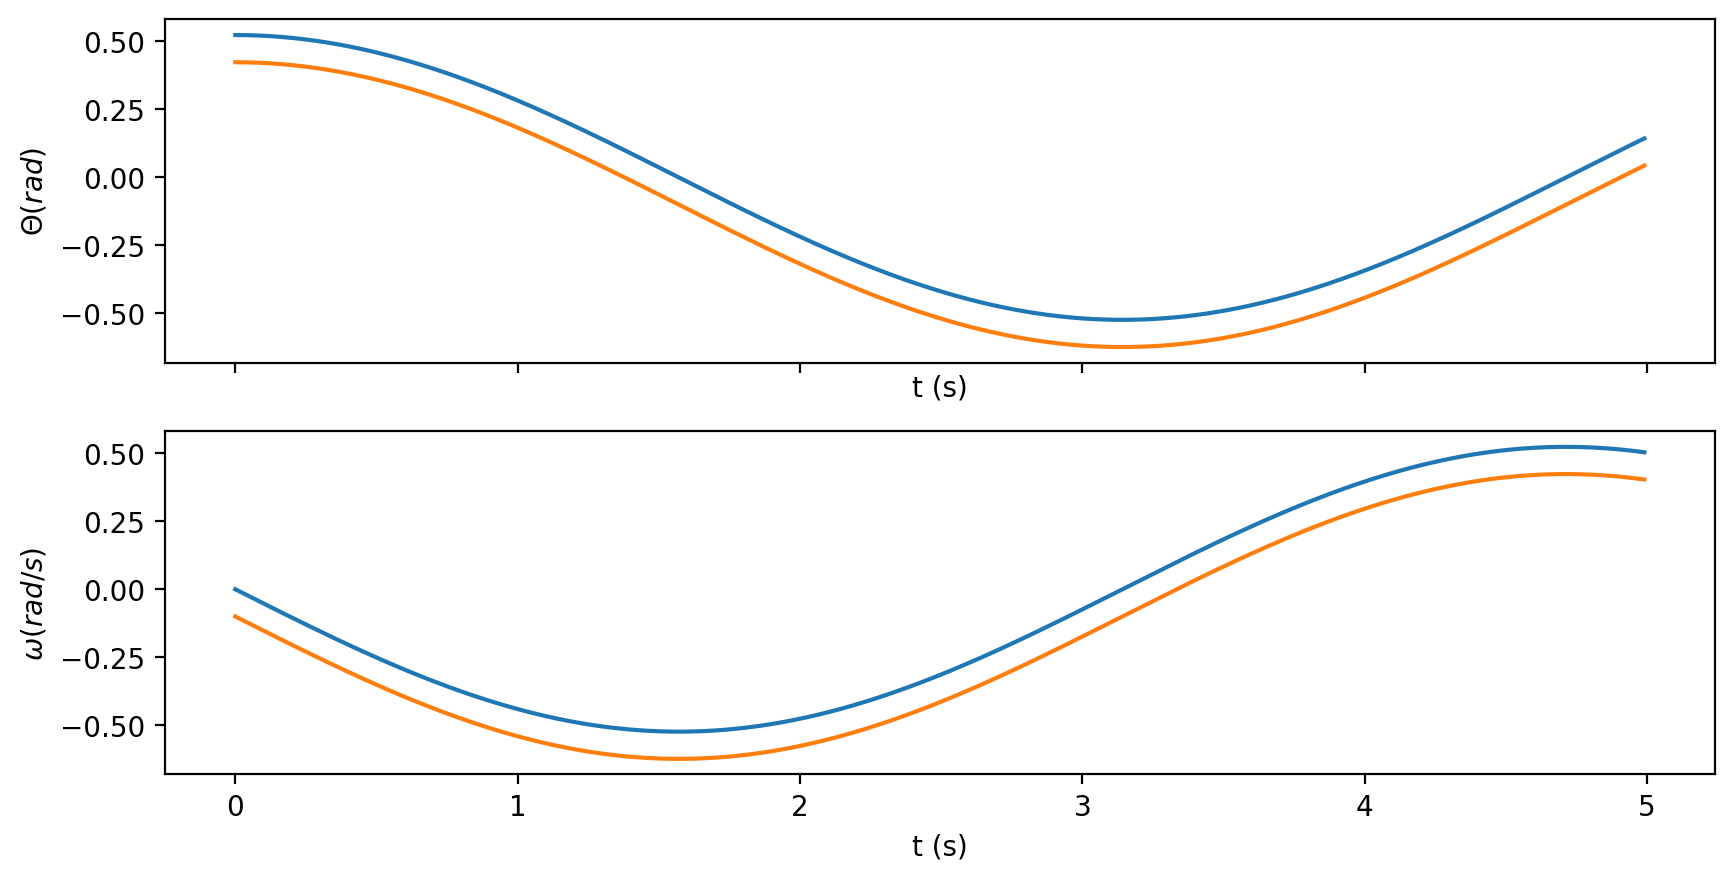

In [2]:
def EC(theta_w,t):
    theta,w = theta_w
    dtheta_dt = w 
    dw_dt = -theta
    return dtheta_dt,dw_dt

tmax = 5
h = 0.01
t = np.arange(0,tmax,h) # times for simulation 
theta0 = pi/6 # initial position 
w0 = 0

theta_w_odeint = odeint(EC,(theta0,w0),t) # integrate using odeint



# This defines the derivative functions for both x and y
def RK(theta, w, t):
    dthetadt = w
    dwdt = -theta
    return dthetadt,dwdt # return derivatives as tuple


t = np.arange(0,tmax,h) 

theta = np.zeros([int(tmax/h)])
w = np.zeros([int(tmax/h)])
theta[0] = theta0
w[0] = w0

for j in range(1, int(tmax/h)): 
    time = h*(j-1)
    dthetadt, dwdt = RK(theta0, w0, time) # calculate derivative function at initial step # evaluate x, y and t at midpoint using Euler starting from initial step 
    thetamid = theta0 + (h/2) * dthetadt
    wmid = w0 + (h/2) * dwdt
    tmid = time + (h/2)
    dthetadt, dwdt = RK(thetamid, wmid, tmid) # calculate derivative function at midpoint valu # Calculate x and y values at new time
    theta[j] = theta0 + h * dthetadt
    w[j] = w0 + h * dwdt
    theta0, w0 = theta[j], w[j]


fig,ax = plt.subplots(2,1, sharex=True, figsize=(10,5), dpi=200)
ax[0].plot(t,theta_w_odeint[:,0]) # plot first column of solution which is theta(t) 
ax[0].plot(t,theta-0.1)
ax[0].set_xlabel('t (s)')
ax[0].set_ylabel('$\Theta (rad)$')
ax[1].plot(t,theta_w_odeint[:,1]) # plot second column of solution which is w(t) 
ax[1].plot(t,w-0.1)
ax[1].set_xlabel('t (s)')
ax[1].set_ylabel('$\omega (rad/s)$')

#plt.subplots_adjust(hspace=0)
plt.show()

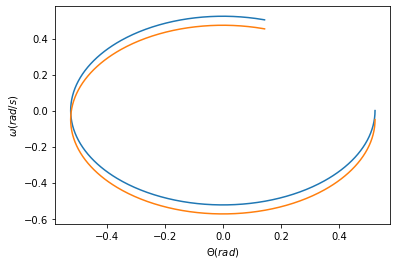

In [3]:
plt.plot(theta_w_odeint[:,0], theta_w_odeint[:,1]) # plot first column of solution which is y(t) 
plt.plot(theta, w-0.05)
plt.xlabel('$\Theta (rad)$')
plt.ylabel('$\omega (rad/s)$')
plt.show()

### 2. Nonlinear Pendulum

<Figure size 864x1008 with 0 Axes>

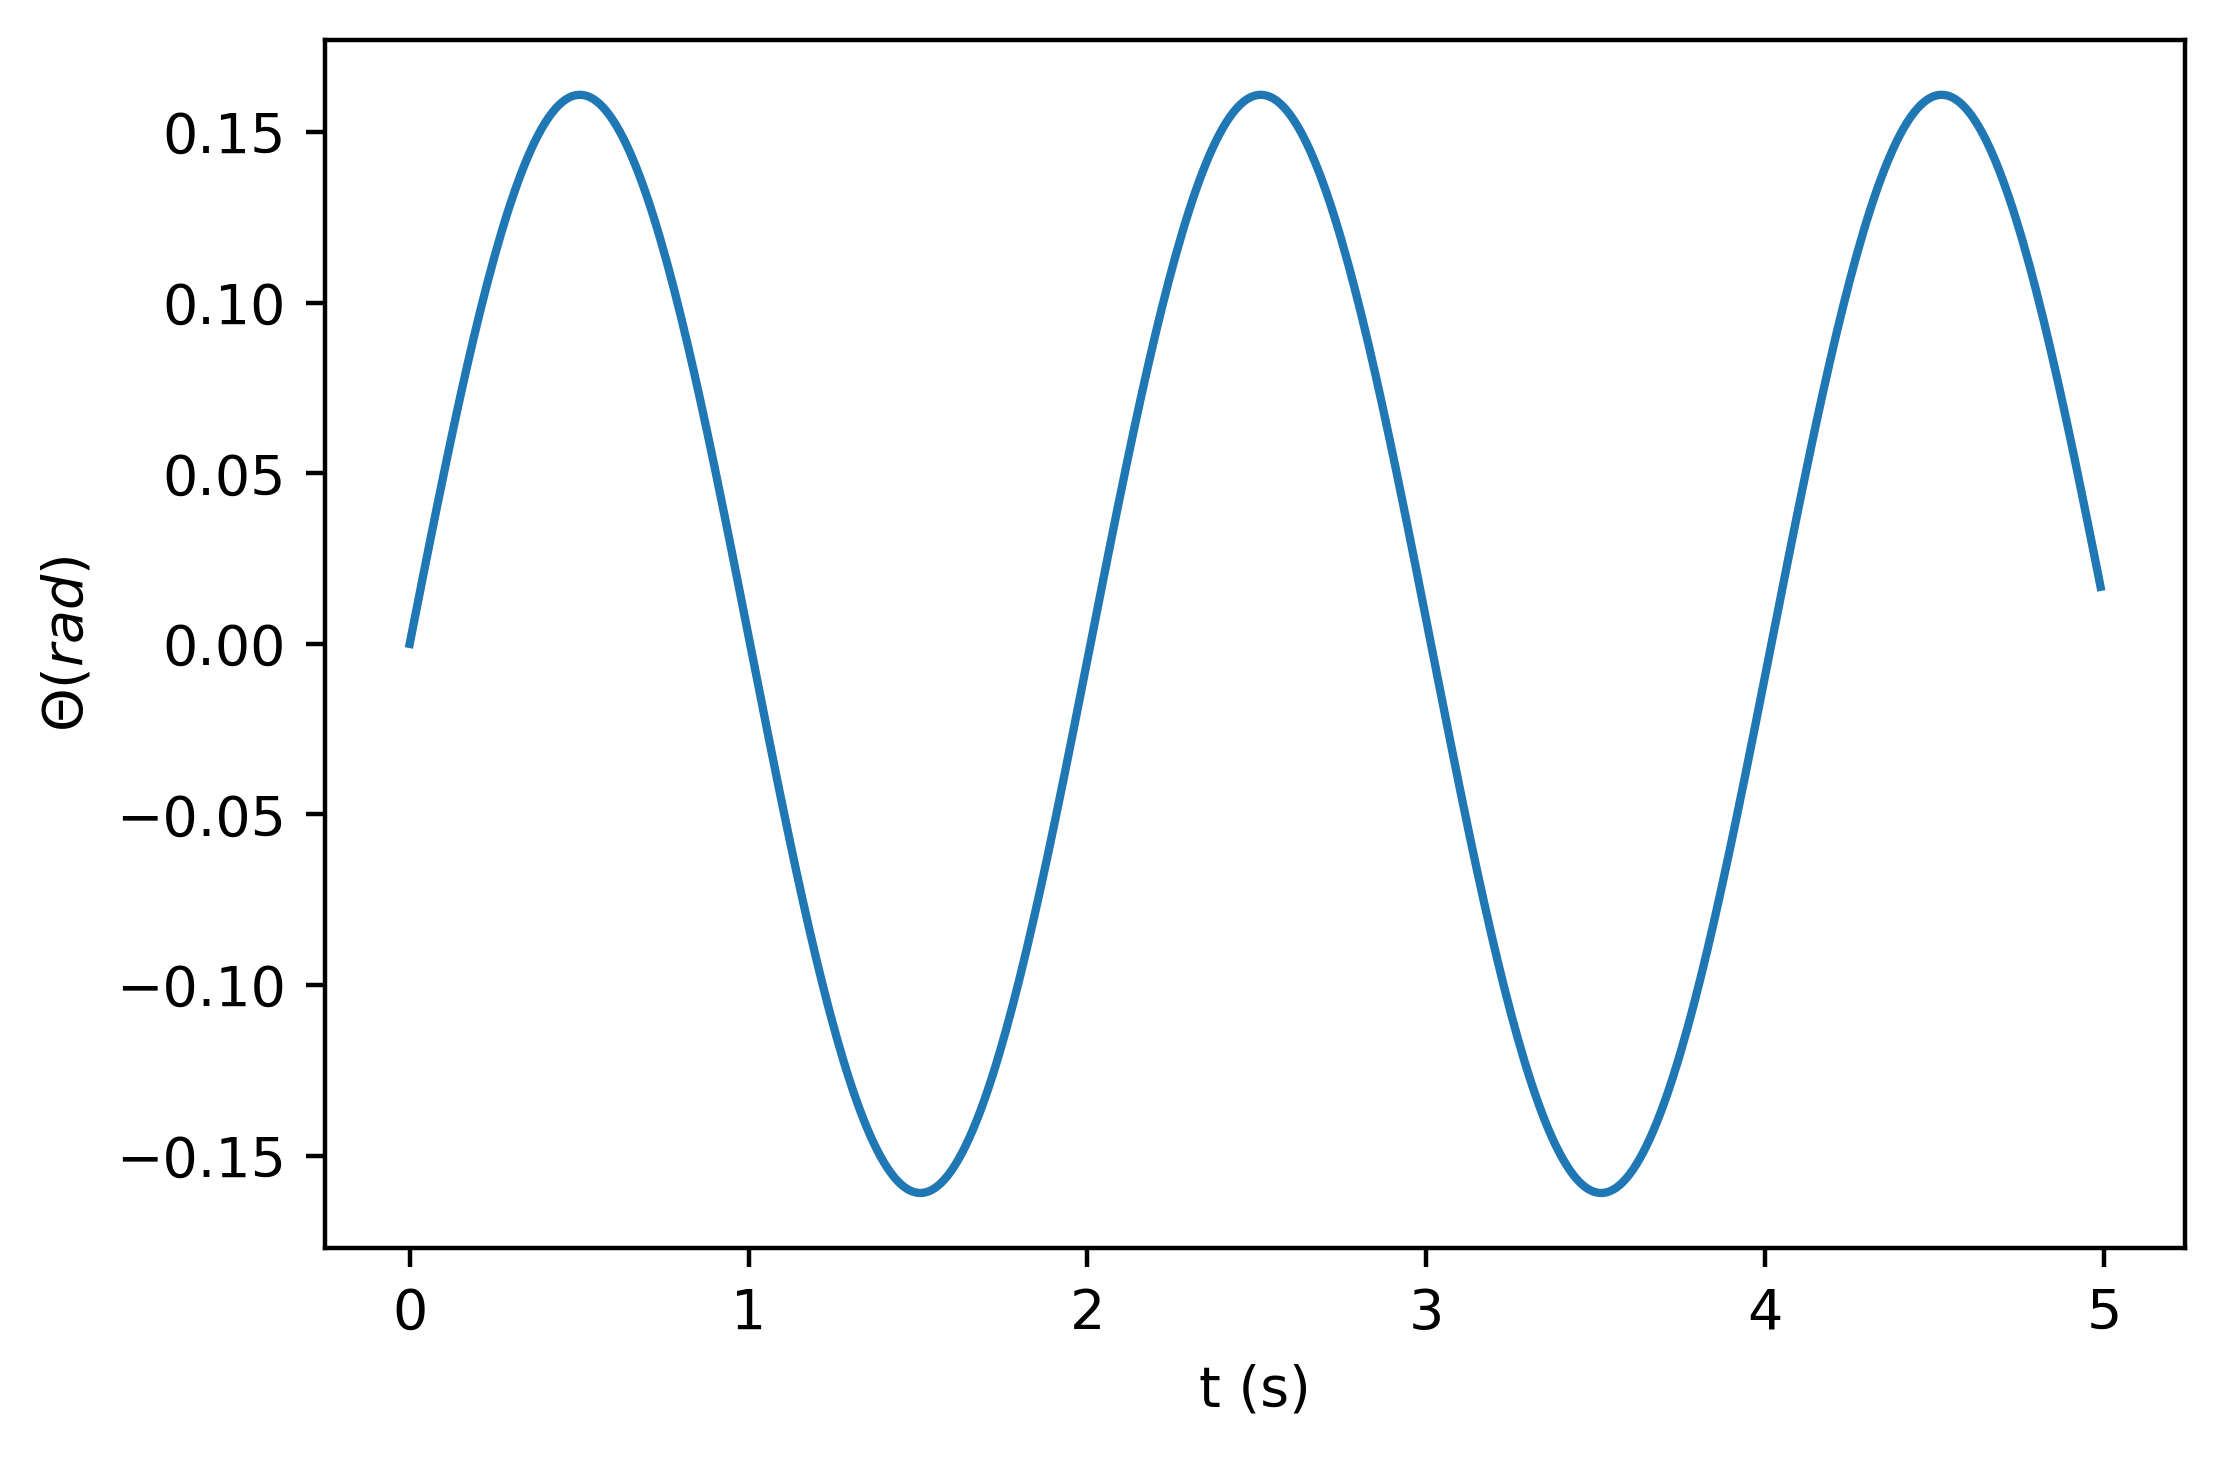

In [4]:
def EC(theta_w,t):
    theta,w = theta_w
    dtheta_dt = w 
    dw_dt = -g/l*sin(theta)
    return dtheta_dt,dw_dt

g = 9.81
l = 1      #(m)
tmax = 5
h = 0.01
t = np.arange(0,tmax,h) # times for simulation 
theta0 = 0 # initial position 

theta_w_odeint = odeint(EC,(theta0,w0),t) # integrate using odeint
theta = theta_w_odeint[:,0]
w = theta_w_odeint[:,1]

plt.figure(figsize=(12,14))
plt.figure(dpi=400)
plt.plot(t,theta)
plt.xlabel('t (s)')
plt.ylabel('$\Theta (rad)$')
plt.show()

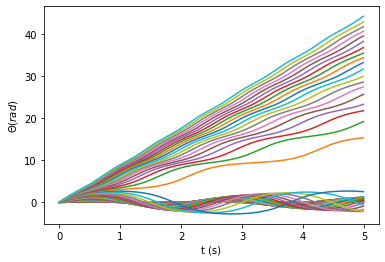

In [5]:
for w0 in np.linspace(0,10,50):
    theta_w_odeint = odeint(EC,(theta0,w0),t) # integrate using odeint
    theta = theta_w_odeint[:,0]
    w = theta_w_odeint[:,1]
    plt.plot(t,theta)

plt.xlabel('t (s)')
plt.ylabel('$\Theta (rad)$')
plt.show()

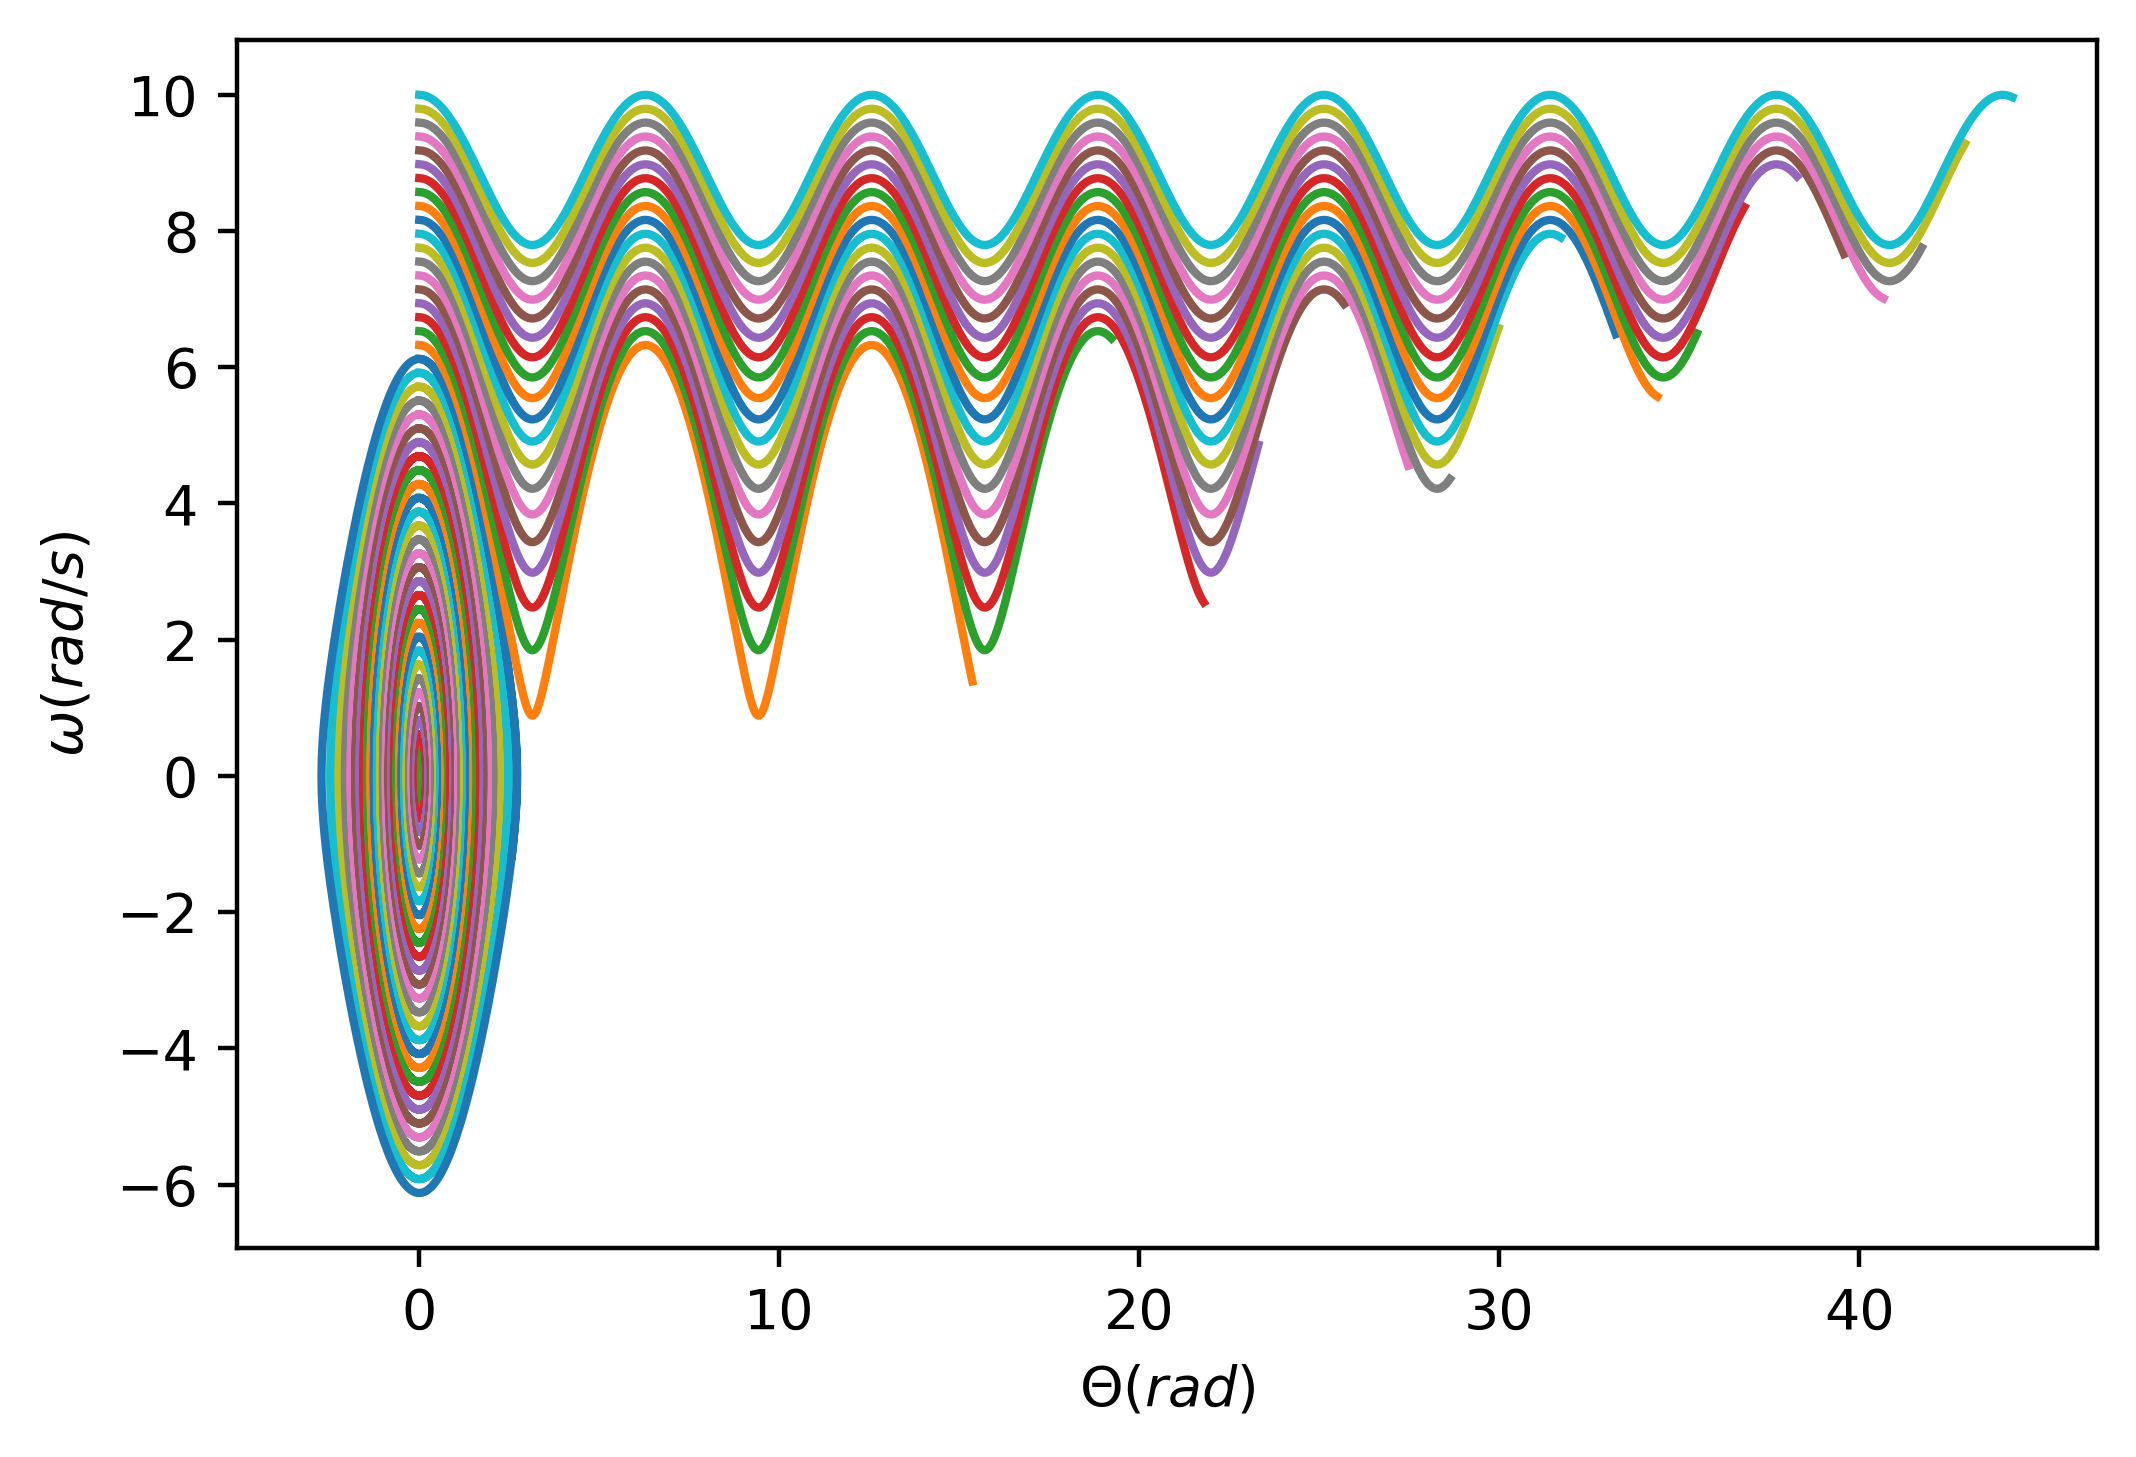

In [6]:
plt.figure(dpi=400)
for w0 in np.linspace(0,10,50):
    theta_w_odeint = odeint(EC,(theta0,w0),t) # integrate using odeint
    theta = theta_w_odeint[:,0]
    w = theta_w_odeint[:,1]
    plt.plot(theta,w)

plt.xlabel('$\Theta (rad)$')
plt.ylabel('$\omega (rad/s)$')
plt.show()

### 4. Rabbits and Foxes

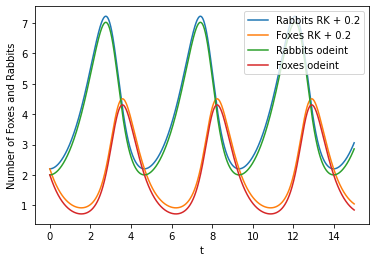

In [7]:
def F_ode(vec,t):
    R,F = vec # unpack vector into the two dependent variables 
    dRdt = alpha*R-beta*R*F
    dFdt = gamma*R*F-delta*F
    return dRdt,dFdt

def RK(R,F,t):
    dRdt = alpha*R-beta*R*F
    dFdt = gamma*R*F-delta*F
    return dRdt,dFdt # return derivatives as tuple


#RK
alpha = 1
beta = 0.5
delta = 2
gamma = 0.5

h = 0.01
tmax = 15
t = np.arange(0,tmax,h) 
R = np.zeros([int(tmax/h)])
F = np.zeros([int(tmax/h)])
R0 = 2
F0 = 2
R[0] = R0
F[0] = F0

for j in range(1, int(tmax/h)): 
    time = h*(j-1)
    dRdt, dFdt = RK(R0, F0, time) # calculate derivative function at initial step # evaluate x, y and t at midpoint using Euler starting from initial step 
    Rmid = R0 + (h/2) * dRdt
    Fmid = F0 + (h/2) * dFdt
    tmid = time + (h/2)
    dRdt, dFdt = RK(Rmid, Fmid, tmid) # calculate derivative function at midpoint valu # Calculate x and y values at neF time
    R[j] = R0 + h * dRdt
    F[j] = F0 + h * dFdt
    R0, F0 = R[j], F[j]
    
#odeint
R0 = 2
F0 = 2
RF = odeint(F_ode,(R0,F0),t)

plt.plot(t,R+0.2,label='Rabbits RK + 0.2')
plt.plot(t,F+0.2,label='Foxes RK + 0.2')
plt.plot(t,RF[:,0],label='Rabbits odeint') # plot first column of solution which is x(t) 
plt.plot(t,RF[:,1],label='Foxes odeint') # plot first column of solution which is y(t) 
plt.xlabel('t')
plt.ylabel('Number of Foxes and Rabbits')
plt.legend()
plt.show()

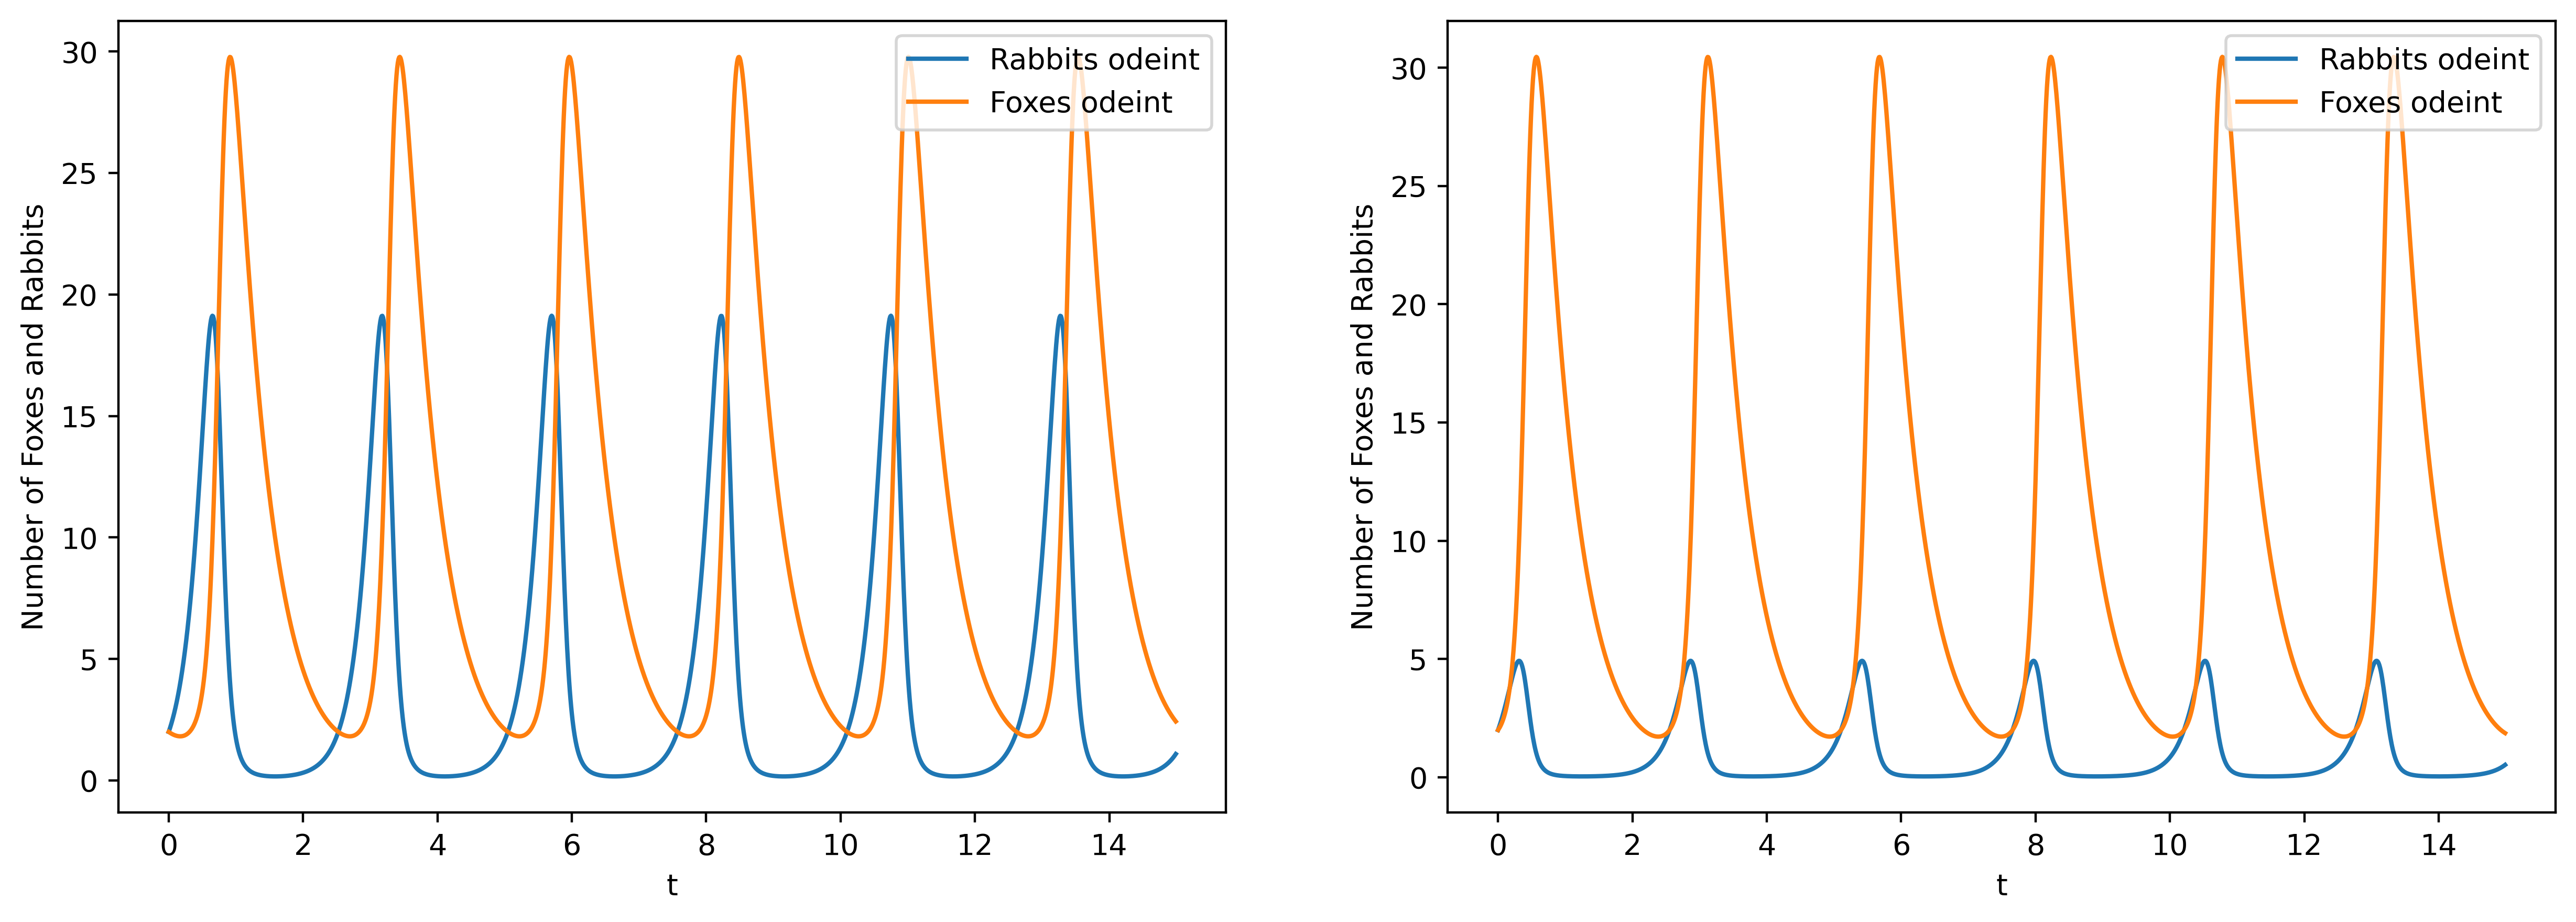

In [8]:
#I will change alpha to 5 and expect a huge increase in the number of rabbits, then increase gamma to 2 and expect a decrease in both rabbits and foxes
alpha = 5
beta = 0.5
delta = 2
gamma = 0.5

h= 0.01
tmax = 15
t = np.arange(0,tmax,h) 
R0 = 2
F0 = 2
RF = odeint(F_ode,(R0,F0),t)

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(15,5),dpi=400)
ax1.plot(t,RF[:,0],label='Rabbits odeint') # plot first column of solution which is x(t) 
ax1.plot(t,RF[:,1],label='Foxes odeint') # plot first column of solution which is y(t) 
ax1.set_xlabel('t')
ax1.set_ylabel('Number of Foxes and Rabbits')
ax1.legend()

gamma = 2

RF = odeint(F_ode,(R0,F0),t)

ax2.plot(t,RF[:,0],label='Rabbits odeint') # plot first column of solution which is x(t) 
ax2.plot(t,RF[:,1],label='Foxes odeint') # plot first column of solution which is y(t) 
ax2.set_xlabel('t')
ax2.set_ylabel('Number of Foxes and Rabbits')
ax2.legend()

plt.show()

increasing the population of rabbits actually helps the foxes rather than the rabbits and then when you equally increase both rabbits and foxes euqally from there there are even less rabbits

### 5. Orbit of a planet

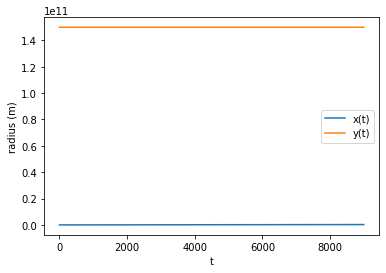

In [9]:
def f_x(xvec,t):
    x,vx = xvec
    dxdt = vx
    dvxdt = -(G*m*M*x)/R**3
    return dxdt,dvxdt
    
def f_y(yvec,t):
    y,vy = yvec
    dydt = vy
    dvydt = -(G*m*M*y)/R**3
    return dydt,dvydt

def f(vec,t):
    x,y,vx,vy = vec
    r = np.sqrt(x**2+y**2)
    dxdt = vx
    dvxdt = -(G*M*x)/r**3
    dydt = vy
    dvydt = -(G*M*y)/r**3
    return dxdt,dydt,dvxdt,dvydt

G = c.G
m = 5.97219e24 #kg
M = 2e30 #kg
R = 1.5e11 #km

t = np.arange(0,9000,1)
x0 = 0.0
y0 = 1.5e11 #m
vx0 = 3e4 #m/s
vy0 = 0
#xvx = odeint(f_x,(x0,vx0),t)
#yvy = odeint(f_y,(y0,vy0),t)
xy = odeint(f,(x0,y0,vx0,vy0),t)
#x = xvx[:,0]
#y = yvy[:,0]
#r = sqrt(x**2+y**2)

plt.plot(t,xy[:,0],label='x(t)')
plt.plot(t,xy[:,1],label='y(t)')
plt.xlabel('t')
plt.ylabel('radius (m)')
plt.legend()
plt.show()

### 6. Comparing Exponential and Logistic Growth

[[  1.        ]
 [  1.0010015 ]
 [  1.00200401]
 ...
 [671.7337914 ]
 [672.85806897]
 [673.98498688]]


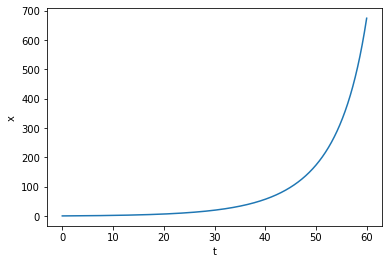

In [20]:
def logistic(N,t):
    return r*N*(1+N/Ntot)

r = [0.1,1,10]
Ntot = 1000

t = np.arange(0,60,0.01)
N0 = 1
for i in r[:1]:
    r = i
    x = odeint(logistic,N0,t)
    plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()